# Homework 2 – Data Analysis in Business
## Text Analytics

This notebook contains a complete solution of Homework 2 for the course *Data Analysis in Business*.
It is structured into four parts:
1. TF–IDF Lyric Analysis for three songs.
2. Comparison of text vectorization methods (TF–IDF, CountVectorizer, Word2Vec).
3. Statistical analysis and visualization of text data.
4. Sentiment classification on IMDB reviews with a pre–trained BERT model.

Run the cells from top to bottom. You will need to paste the lyrics of the three songs manually because full lyrics are copyrighted content and cannot be included directly.

In [1]:
%%capture
!pip install nltk wordcloud gensim transformers datasets scikit-learn torch --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from wordcloud import WordCloud
from gensim.models import Word2Vec

import torch
from torch.utils.data import DataLoader
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

---
# Part 1 – TF–IDF Lyric Analysis

**Songs (English):**
- Bee Gees – *Stayin' Alive*
- Billie Eilish – *lovely*
- Alex Warren – *Ordinary*

In [3]:
# Paste full lyrics for each song into the triple–quoted strings below.
# Do not change the keys of the dictionary, only replace the placeholder text.

songs_raw = {
    "Bee Gees - Stayin' Alive": """Two, three, four
One, two, three
Well, you can tell by the way I use my walk
I'm a woman's man no time to talk
Music loud and women warm, I've been kicked around
Since I was born
And now it's all right, it's okay
And you may look the other way
But we can try to understand
The New York Times' effect on man
Whether you're a brother or whether you're a mother
You're stayin' alive, stayin' alive
Feel the city breakin' and everybody shakin'
And we're stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive
Ah when you want
Well now, I get low and I get high
And if I can't get either, I really try
Got the wings of heaven on my shoes
I'm a dancin' man and I just can't lose
You know it's all right, it's okay
I'll live to see another day
We can try to understand
The New York Times' effect on man
Whether you're a brother or whether you're a mother
You're stayin' alive, stayin' alive
Feel the city breakin' and everybody shakin'
And we're stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive
Life goin' nowhere, somebody help me
Somebody help me, yeah
Life goin' nowhere, somebody help me
I'm stayin' alive
Well, you can tell by the way I use my walk
I'm a woman's man no time to talk
Music loud and the women warm
I've been kicked around since I was born
And now it's all right, it's okay
And you may look the other way
We can try to understand
The New York Times' effect on man
Whether you're a brother or whether you're a mother
You're stayin' alive, stayin' alive
Feel the city breakin' and everybody shakin'
And we're stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive, stayin' alive
Ah, ha, ha, ha, stayin' alive
Life goin' nowhere, somebody help me
Somebody help me, yeah
Life goin' nowhere, somebody help me, yeah
I'm stayin' alive
Life goin' nowhere, somebody help me
Somebody help me, yeah
Life goin' nowhere, somebody help me, yeah
I'm stayin' alive
Life goin' nowhere, somebody help me
Somebody help me, yeah
Life goin' nowhere, somebody help me, yeah
I'm stayin' alive
Life goin' nowhere, somebody help me
Somebody help me, yeah
Life goin' nowhere, somebody help me, yeah
I'm stayin' alive""",
    "Billie Eilish - lovely": """Thought I found a way
Thought I found a way out (found)
But you never go away (never go away)
So I guess I gotta stay now
Oh, I hope some day I'll make it out of here
Even if it takes all night or a hundred years
Need a place to hide, but I can't find one near
Wanna feel alive, outside I can't fight my fear
Isn't it lovely, all alone?
Heart made of glass, my mind of stone
Tear me to pieces, skin to bone
Hello, welcome home
Walkin' out of time
Lookin' for a better place (lookin' for a better place)
Something's on my mind (mind)
Always in my head space
But I know some day I'll make it out of here
Even if it takes all night or a hundred years
Need a place to hide, but I can't find one near
Wanna feel alive, outside I can't fight my fear
Isn't it lovely, all alone?
Heart made of glass, my mind of stone
Tear me to pieces, skin to bone
Hello, welcome home
Whoa, yeah
Yeah, ah
Whoa, whoa
Hello, welcome home""",
    "Alex Warren - Ordinary": """They say, "The holy water's watered down
And this town's lost its faith
Our colors will fade eventually"
So if our time is runnin' out
Day after day
We'll make the mundane our masterpiece
Oh my, my
Oh my, my love
I take one look at you
You're takin' me out of the ordinary
I want you layin' me down 'til we're dead and buried
On the edge of your knife, stayin' drunk on your vine
The angels up in the clouds are jealous, knowin' we found
Somethin' so out of the ordinary
You got me kissin' the ground of your sanctuary
Shatter me with your touch, oh Lord, return me to dust
The angels up in the clouds are jealous, knowin' we found
Hopeless Hallelujah
On this side of Heaven's gate
Oh, my life, how do ya
Breathe and take my breath away?
At your altar, I will pray
You're the sculptor, I'm the clay
Oh my, my
You're takin' me out of the ordinary
I want you layin' me down 'til we're dead and buried
On the edge of your knife, stayin' drunk on your vine
The angels up in the clouds are jealous, knowin' we found
Somethin' so out (out) of the ordinary (ordinary)
You got me kissin' the ground (ground) of your sanctuary (sanctuary)
Shatter me with your touch, oh Lord, return me to dust
The angels up in the clouds are jealous, knowin' we found
Somethin' so heavenly, higher than ecstasy
Whenever you're next to me, oh my, my
World was in black and white until I saw your light
I thought you had to die to find
Somethin' so out of the ordinary
I want you layin' me down 'til we're dead and buried
On the edge of your knife, stayin' drunk on your vine
The angels up in the clouds are jealous, knowin' we found
Somethin' so out (out) of the ordinary
You got me kissin' the ground (ground) of your sanctuary (sanctuary)
Shatter me with your touch, oh Lord, return me to dust
The angels up in the clouds are jealous, knowin' we found""",
}

for name, text in songs_raw.items():
    print(name, "- number of characters:", len(text))

Bee Gees - Stayin' Alive - number of characters: 2210
Billie Eilish - lovely - number of characters: 912
Alex Warren - Ordinary - number of characters: 1827


## 1.1 Preprocessing

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    text = text.lower()
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for tok in tokens:
        if tok.isalpha() and tok not in stop_words and len(tok) > 2:
            lemma = lemmatizer.lemmatize(tok)
            cleaned_tokens.append(lemma)
    return " ".join(cleaned_tokens)

songs_clean = {name: preprocess_text(lyrics) for name, lyrics in songs_raw.items()}

pd.DataFrame({
    'song': list(songs_clean.keys()),
    'clean_text_length': [len(t.split()) for t in songs_clean.values()]
})

,song,clean_text_length
0,Bee Gees - Stayin' Alive,243
1,Billie Eilish - lovely,104
2,Alex Warren - Ordinary,150


## 1.2 TF–IDF

In [5]:
tfidf_vectorizer = TfidfVectorizer()
corpus = list(songs_clean.values())
song_names = list(songs_clean.keys())

tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=song_names,
    columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df.head()

,alive,alone,altar,always,angel,another,around,away,better,black,...,whenever,whether,white,whoa,wing,woman,world,yeah,year,york
Bee Gees - Stayin' Alive,0.458126,0.000000,0.000000,0.000000,0.000000,0.023169,0.046337,0.000000,0.000000,0.000000,...,0.000000,0.139011,0.000000,0.00000,0.023169,0.092674,0.000000,0.158582,0.000000,0.069506
Billie Eilish - lovely,0.106996,0.140687,0.000000,0.070343,0.000000,0.000000,0.000000,0.106996,0.140687,0.000000,...,0.000000,0.000000,0.000000,0.21103,0.000000,0.000000,0.000000,0.106996,0.140687,0.000000
Alex Warren - Ordinary,0.000000,0.000000,0.046283,0.000000,0.277698,0.000000,0.000000,0.035199,0.000000,0.046283,...,0.046283,0.000000,0.046283,0.00000,0.000000,0.000000,0.046283,0.000000,0.000000,0.000000


In [6]:
def top_tfidf_terms(row, top_n=15):
    sorted_idx = np.argsort(-row.values)[:top_n]
    return pd.Series({row.index[i]: row.values[i] for i in sorted_idx})

top_terms_per_song = {}
for song in song_names:
    top_terms_per_song[song] = top_tfidf_terms(tfidf_df.loc[song])

for song, series in top_terms_per_song.items():
    print("\n===", song, "===")
    display(series.to_frame('tfidf').round(3))


=== Bee Gees - Stayin' Alive ===


,tfidf
alive,0.458
stayin,0.458
somebody,0.348
help,0.348
goin,0.232
nowhere,0.232
life,0.176
yeah,0.159
whether,0.139
man,0.139



=== Billie Eilish - lovely ===


,tfidf
place,0.281
mind,0.281
hello,0.211
home,0.211
welcome,0.211
whoa,0.211
found,0.160
better,0.141
fear,0.141
glass,0.141



=== Alex Warren - Ordinary ===


,tfidf
ordinary,0.324
angel,0.278
jealous,0.278
cloud,0.278
knowin,0.278
sanctuary,0.231
ground,0.231
somethin,0.231
found,0.211
buried,0.139


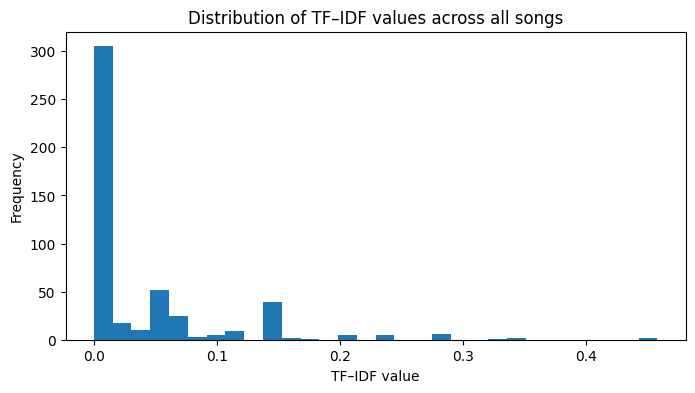

/tmp/ipython-input-790030368.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tfidf_df.T.values, labels=song_names)


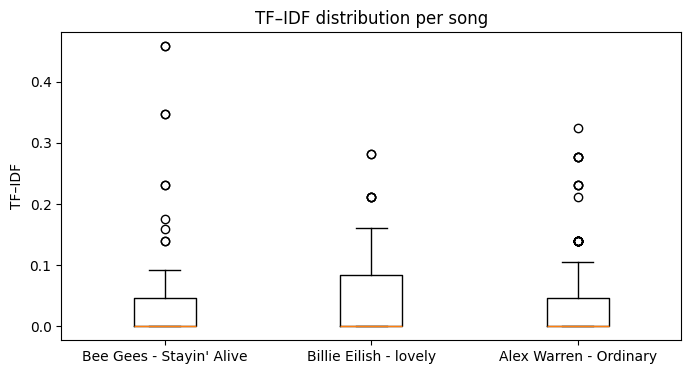

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(tfidf_df.values.flatten(), bins=30)
plt.xlabel('TF–IDF value')
plt.ylabel('Frequency')
plt.title('Distribution of TF–IDF values across all songs')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(tfidf_df.T.values, labels=song_names)
plt.ylabel('TF–IDF')
plt.title('TF–IDF distribution per song')
plt.show()

---
# Part 2 – Vectorization Methods: Count, TF–IDF, Word2Vec

In [8]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(corpus)
count_df = pd.DataFrame(
    count_matrix.toarray(),
    index=song_names,
    columns=count_vectorizer.get_feature_names_out()
)
count_df.head()

,alive,alone,altar,always,angel,another,around,away,better,black,...,whenever,whether,white,whoa,wing,woman,world,yeah,year,york
Bee Gees - Stayin' Alive,26,0,0,0,0,1,2,0,0,0,...,0,6,0,0,1,4,0,9,0,3
Billie Eilish - lovely,2,2,0,1,0,0,0,2,2,0,...,0,0,0,3,0,0,0,2,2,0
Alex Warren - Ordinary,0,0,1,0,6,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0


In [9]:
tokenized_corpus = [text.split() for text in songs_clean.values()]

w2v_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=2,
    epochs=200
)

def song_vector(tokens):
    vectors = []
    for tok in tokens:
        if tok in w2v_model.wv:
            vectors.append(w2v_model.wv[tok])
    if not vectors:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)

w2v_vectors = np.vstack([song_vector(tokens) for tokens in tokenized_corpus])
w2v_df = pd.DataFrame(w2v_vectors, index=song_names)
w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Bee Gees - Stayin' Alive,-0.416032,0.115223,0.009057,0.263465,-0.109156,-0.422420,0.535271,0.897320,-0.744226,-0.498765,...,0.330824,0.322780,0.023317,-0.104142,0.506758,0.402094,0.429432,-0.524627,0.162024,0.103178
Billie Eilish - lovely,-0.097502,0.397522,0.061577,-0.258109,0.241420,-0.365980,0.135814,0.715407,-0.291077,0.238136,...,0.466223,0.203495,-0.094624,0.264939,0.460858,0.115321,0.087698,-0.301149,0.133920,-0.331263
Alex Warren - Ordinary,0.173676,0.017870,-0.312778,-0.160285,0.020581,-0.608071,0.170284,0.645573,-0.038165,-0.396974,...,0.218196,0.259848,0.104849,0.269518,0.336309,-0.047208,-0.109888,-0.026338,0.150103,0.063581


---
# Part 3 – Statistical Analysis and Visualization

In [10]:
all_tokens = []
for text in songs_clean.values():
    all_tokens.extend(text.split())

word_counts = Counter(all_tokens)
top_10_words = word_counts.most_common(10)
pd.DataFrame(top_10_words, columns=['word', 'count'])

,word,count
0,stayin,29
1,alive,28
2,somebody,15
3,help,15
4,life,11
5,yeah,11
6,goin,10
7,nowhere,10
8,found,9
9,time,7


In [11]:
def generate_ngrams(tokens, n=2):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

bigrams = generate_ngrams(all_tokens, n=2)
bigram_counts = Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
pd.DataFrame([' '.join(bg) for bg, c in top_10_bigrams], columns=['bigram'])\
    .assign(count=[c for bg, c in top_10_bigrams])

,bigram,count
0,stayin alive,26
1,alive stayin,15
2,somebody help,15
3,life goin,10
4,goin nowhere,10
5,nowhere somebody,10
6,help yeah,9
7,angel cloud,6
8,cloud jealous,6
9,jealous knowin,6


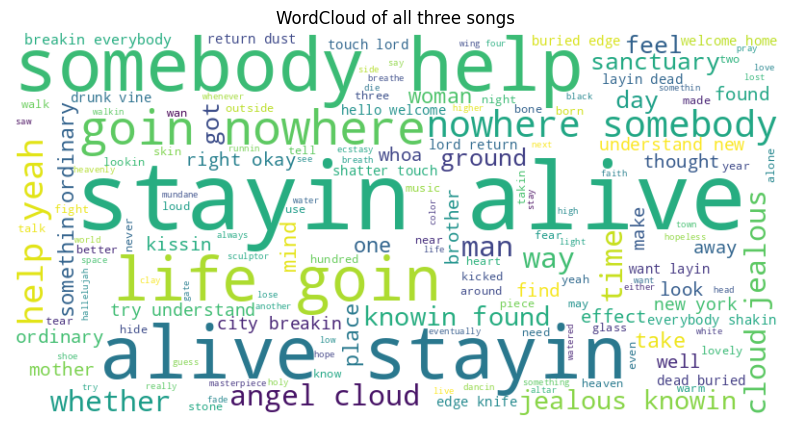

In [12]:
full_text = ' '.join(all_tokens)
wc = WordCloud(width=800, height=400, background_color='white').generate(full_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of all three songs')
plt.show()

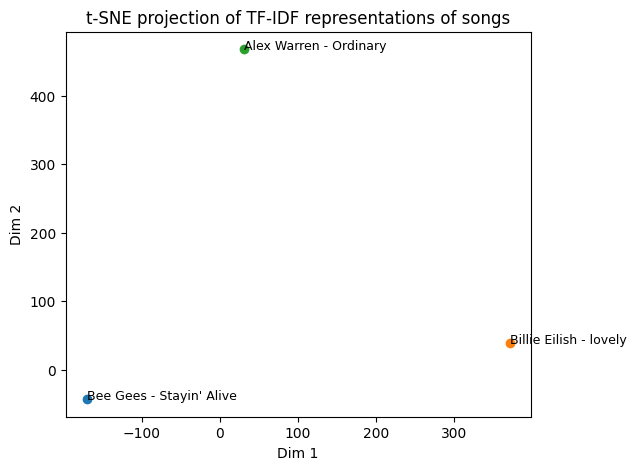

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# perplexity должна быть < числа строк в tfidf_matrix (у тебя 3 песни)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
tfidf_tsne = tsne.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(6, 5))
for i, name in enumerate(song_names):
    plt.scatter(tfidf_tsne[i, 0], tfidf_tsne[i, 1])
    plt.text(tfidf_tsne[i, 0] + 0.1, tfidf_tsne[i, 1] + 0.1, name, fontsize=9)
plt.title('t-SNE projection of TF-IDF representations of songs')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()


---
# Part 4 – Sentiment Classification with BERT (manual training loop)

This part uses a manual PyTorch training loop (no `Trainer`), so there are no import issues with `Trainer` or `TrainingArguments`.

## 4.1 Load IMDB dataset

In [14]:
from google.colab import files

uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
imdb_df = pd.read_csv(io.BytesIO(uploaded[filename]))
imdb_df.head()

Saving IMDB Dataset.csv to IMDB Dataset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
imdb_df = imdb_df.dropna(subset=['review', 'sentiment']).copy()
label_mapping = {"negative": 0, "positive": 1}
imdb_df['label'] = imdb_df['sentiment'].map(label_mapping)
imdb_df = imdb_df.dropna(subset=['label'])
imdb_df['review'] = imdb_df['review'].astype(str)

train_df, test_df = train_test_split(imdb_df, test_size=0.2, random_state=42, stratify=imdb_df['label'])
len(train_df), len(test_df)

(40000, 10000)

## 4.2 Tokenization and datasets

In [16]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def tokenize_batch(batch):
    return tokenizer(
        batch['review'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

train_dataset = Dataset.from_pandas(train_df[['review', 'label']])
test_dataset = Dataset.from_pandas(test_df[['review', 'label']])

train_dataset = train_dataset.map(tokenize_batch, batched=True)
test_dataset = test_dataset.map(tokenize_batch, batched=True)

train_dataset = train_dataset.rename_column('label', 'labels')
test_dataset = test_dataset.rename_column('label', 'labels')

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

## 4.3 Model and training loop

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# меньше эпох и ограничиваем число батчей за эпоху
num_epochs = 1
max_batches_per_epoch = 300  # можно уменьшить до 200/100, если всё ещё долго

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for step, batch in enumerate(train_loader):
        if step >= max_batches_per_epoch:
            break  # выходим, чтобы не гонять все данные

        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / (step + 1)
    print(f"Epoch {epoch+1}/{num_epochs}, training loss: {avg_loss:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1, training loss: 0.3533


## 4.4 Evaluation

In [19]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print('Accuracy:', accuracy_score(all_labels, all_preds))
print('\nClassification report:')
print(classification_report(all_labels, all_preds, target_names=['negative', 'positive']))

Accuracy: 0.8902

Classification report:
              precision    recall  f1-score   support

    negative       0.94      0.84      0.88      5000
    positive       0.85      0.94      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [20]:
# Inspect several examples
for i in range(5):
    text = test_df.iloc[i]['review']
    true_label = test_df.iloc[i]['label']
    enc = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=256)
    enc = {k: v.to(device) for k, v in enc.items()}
    with torch.no_grad():
        out = model(**enc)
        pred_label = torch.argmax(out.logits, dim=1).item()
    print('\nReview snippet:', text[:300].replace('\n', ' '))
    print('True label   :', 'positive' if true_label == 1 else 'negative')
    print('Predicted    :', 'positive' if pred_label == 1 else 'negative')


Review snippet: Yes, MTV there really is a way to market Daria. What started as a clever teenage angst-"comment on everything that sucks and make the viewer feel better about their sucky teenage life" sitcom now mutated into a "how you should deal with your problems"-charade. I used to watch Daria all the time and 
True label   : negative
Predicted    : positive

Review snippet: The story of the bride fair is an amusing and engaging one, and it is to the filmmaker's credit that he sets out to portray rural Minnesotans with the same respect ordinarily reserved for Coast-dwellers. It is weird, though, to find an independent movie, the brainchild of a single person, that is as
True label   : negative
Predicted    : positive

Review snippet: A team varied between Scully and Mulder, two other scientists, a pilot, and the guy who plays Bana on Seinfeld, go up to an Arctic research post where all members have died off by either killing each other or killing themselves. They discover there's 